# Расчетное задание 2
Тимофеева Юлия, вариант 13, группа 20930


**Задание 1:**
Определить вероятность блокировки пакета днем и ночью, если входной и выходной поток являются пуассоновскими (4 балла).

Делала по формуле из самого расчетного задания: 


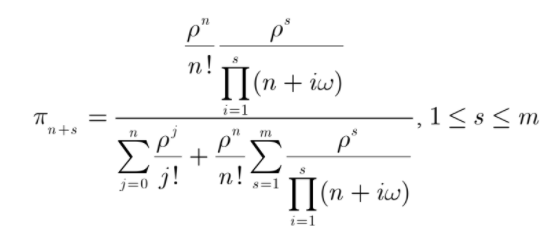

**Задание 2:**
Определить вероятность блокировки пакета в задаче 1, используя метод Монте-Карло. Сравнить результаты (6 баллов).

Использовала алгоритм из расчетного задания, немного видоизменив его под свою задачу

**Задание 3:**
Определить оптимальный размер буфера, чтобы вероятность блокировки пакета не превышала 0.0001 (4 балла).

In [77]:
# Импортирую нужные мне библиотеки
import numpy as np
import math


def task1(k, v, n, lambd, b, mu, m):
    p = lambd / mu   # Интенсивность нагрузки канала  
 
    # Разбиваю формулу на части и считаю:  
    num1 = (p ** k / math.factorial(k))        # p^n/n!
    num2 = (p ** m / k ** m)                            
                       
    whole_num = num1 * num2                    # целый числитель

    denum1 = 0  
    for j in range(0, k + 1):                  # sigma p^j/j!
        denum1 += p ** j / math.factorial(j)                      
  
    denum2 = 0
    for s in range(1, m + 1):
        denum2 += p ** s / k ** s

    denum2 *= p ** k / math.factorial(k)
    
    whole_denum = denum1 + denum2         # целый числитель

    return whole_num / whole_denum
    

def task2(k, lambd, mu, m):
    np.random.seed(100)

    n_rep = 50            # Количество повторов в методе Монте-Карло
    p_refuse = 0          # Вероятность блокировки

    n_lost = 0            # Количество потярянных пакетов
    n_packets = 100000   # Количество пакетов(чем больше, тем дольше считает)

    for i in range(n_rep):
        t = 0                   # Текущее время
        queue = 0               # Текущий размер очереди
        t_free = np.zeros(k)    # Время, когда концентратор освободится

        for f in range(n_packets):
            t += np.random.exponential(scale=1 / lambd)  # Время поступления нового пакета
            n = 0  
            # Проверяем, есть ли очередь
            if queue > 0:  # если есть, то для каждого конденсатора 
                for j in range(k):
                    while t_free[j] < t and queue > 0:
                        # Обрабатываем пакеты из очереди до момента t
                        t_free[j] += np.random.exponential(scale=1 / mu)
                        queue -= 1
            for h in range(k):
                if t_free[h] < t:
                    t_free[h] = t + np.random.exponential(scale=1 / mu)
                    break
                else:
                    n += 1
            if n == k:
                if queue < m:
                    queue += 1    # Ставим пакет в очередь
                else:
                    n_lost += 1          # Пакет теряется
        p_refuse += n_lost / n_packets   # Вероятность отказа: утеряные пакеты/кол-во пакетов

    return p_refuse


def task3(k, v, n, lambd, b, mu, m):
    # использую код для 1 задания, итерирую его пока вероятность отказа не привысит 
    # 0.0001, на каждой итерации увеличиваю размер буффера,
    # если же вероятность отказа превышает допустимое значение - досрочно прерываю цикл
    a = 1
    while 1:
        if (task1(k, v, n, lambd, b, mu, m) > 0.0001):
            b += 1
        else:
            break
    return b


def main():
    # Изначальные данные:

    k = 5               # Количество концентраторов
    v = 5000            # Скорость передачи
    n = 2400            # Средняя длина пакета
    lambda_day = 5      # Интенсивность входного потока днем
    lambda_nght = 0.5   # Интенсивность входного потока ночью
    buffer = 4          # Размер буфера, пакетов
    
    m = k * (buffer - 1)# Максимальный размер очереди, формула была дана лектором
    mu = v / n          # Интенсивность выходного потока
    
    print("1. Вероятность отказа днём: ", "%.30f" % task1(k, v, n, lambda_day, buffer, mu, m))
    print("1. Вероятность отказа ночью ", "%.30f" % task1(k, v, n, lambda_nght, buffer, mu, m))
    print('2. Вероятность отказа по методу Монте-Карло днём: ', "%.30f" % task2(k, lambda_day, mu, m))
    print('2. Вероятность отказа по методу Монте-Карло ночью: ',"%.30f" % task2(k, lambda_nght, mu, m))
    print('3. Оптимальный размер буфера:', task3(k, v, n, lambda_day, buffer, mu, m))


main()

1. Вероятность отказа днём:  0.000000976410641784028560867352
1. Вероятность отказа ночью  0.000000000000000000000000086350
2. Вероятность отказа по методу Монте-Карло днём:  0.000720000000000000045345671662
2. Вероятность отказа по методу Монте-Карло ночью:  0.000000000000000000000000000000
3. Оптимальный размер буфера: 4
